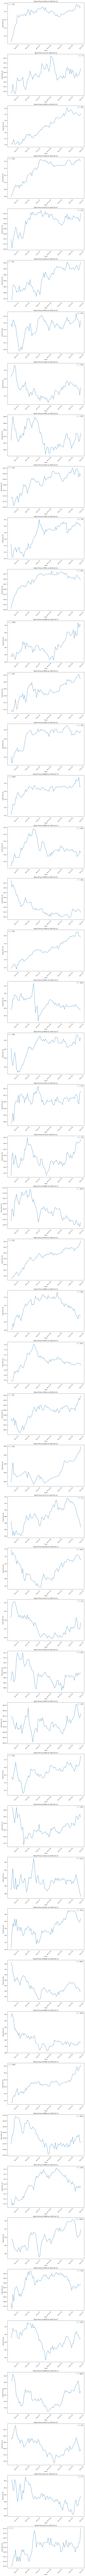

In [1]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd

# Load the data from the pickle file
with open('data_records.pkl', 'rb') as file:
    data_records = pickle.load(file)

# Specify the date for which to plot the data
plot_date = '2025-02-11'

# Number of tickers to plot
tickers = list(data_records[plot_date].keys())

# Create a figure with a separate subplot for each ticker
fig, axes = plt.subplots(len(tickers), 1, figsize=(10, 6 * len(tickers)))

# If only one ticker, axes is a single object, so we make it a list
if len(tickers) == 1:
    axes = [axes]

# Loop through each ticker and plot the 'Close' price against the 'Time' for the specified date
for ax, ticker in zip(axes, tickers):
    stock_data = data_records[plot_date][ticker]
    
    # Ensure the 'Time' column is in datetime format
    stock_data['Time'] = pd.to_datetime(stock_data['Time'])
    
    # Plot the 'Close' price against the 'Time'
    ax.plot(stock_data['Time'], stock_data['Close'], label=ticker)
    
    # Customize each subplot
    ax.set_title(f"Stock Price of {ticker} on {plot_date}")
    ax.set_xlabel('Time')
    ax.set_ylabel('Close Price ($)')
    ax.legend()
    ax.tick_params(axis='x', rotation=45)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()
